# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
import logging


warnings.filterwarnings('ignore')


## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py





### Curvas de Aprendizaje (Learning Curves)

Las Curvas de Aprendizaje son una herramienta de vital importancia para monitorear el rendimiento de un modelo de machine learning y diagnosticar problemas de subentrenamiento (underfitting) o sobreentrenamiento (overfitting), y poder tener un entendimiento claro el desempeño de nuestro, antrenamienot y aprendizaje para nuestros modelos. Las Curvas de Aprendizaje permiten una visualización clara del rendimiento del modelo, facilitando la identificación de problemas y la optimización del proceso de entrenamiento.


#### ¿Qué son?

- **Curva de Entrenamiento**: Muestra el error del modelo en el conjunto de entrenamiento (Train).
- **Curva de Validación**: Muestra el error del modelo en el conjunto de validación (Test).

#### Interpretación

1. **Subentrenamiento (Underfitting)**
   - **Indicativo**: Ambas curvas muestran alto error.
   - **Causa**: Modelo demasiado simple.
   - **Solución**: Aumentar la complejidad del modelo.

2. **Sobreentrenamiento (Overfitting)**
   - **Indicativo**: La curva de entrenamiento muestra bajo error mientras que la de validación muestra alto error.
   - **Causa**: Modelo demasiado complejo.
   - **Solución**: Simplificar el modelo, añadir más datos de entrenamiento o aplicar regularización.

3. **Buen ajuste**
   - **Indicativo**: Ambas curvas convergen hacia un bajo error.
   - **Causa**: Modelo bien equilibrado.

#### Método para Generar Curvas de Aprendizaje

1. **Entrenamiento incremental**: Entrena el modelo con diferentes tamaños del conjunto de entrenamiento.
2. **Evaluación periódica**: Evalúa el error en ambos conjuntos (entrenamiento y validación) después de cada iteración.
3. **Graficación**: Plotea el error en función del tamaño del conjunto de entrenamiento o número de iteraciones.

#### Aplicaciones

- Diagnóstico de problemas de entrenamiento.
- Decisión sobre la necesidad de más datos.
- Ajustes en la arquitectura del modelo o en los hiperparámetros.


## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


El objetivo del artículo es crear un modelo que pueda predecir cómo de exitosas serán las publicaciones en las páginas de Facebook de las marcas. Esto implica varios pasos:

- Construir un modelo predictivo que utilice las características de las publicaciones (como el tipo de contenido, la hora de publicación, etc.) para anticipar su impacto.
- Medir la precisión del modelo comparando las predicciones con los resultados reales.
- Analizar qué factores influyen más en el éxito de una publicación para ayudar a los gerentes a tomar mejores decisiones sobre qué y cuándo publicar.
- Utilizar estos conocimientos para mejorar la construcción de la marca, ayudando a aumentar el reconocimiento y la fidelidad de los clientes a través de publicaciones más efectivas en redes sociales.


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### Descripción de las 8 Variables Utilizadas en el Análisis

A continuación se describe el significado de las 8 variables que se utilizarán para el análisis, basado en la información proporcionada en las Tablas 2 y 3 del artículo de Moro et al.

#### Variables de Entrada

1. **Page total likes**
   - **Descripción:** Número de personas que han dado "me gusta" a la página de la empresa.
   - **Tipo de dato:** Numérico
   - **Fuente:** Facebook
   - **Importancia:** Esta variable representa la base de seguidores de la página, lo cual puede influir en el alcance y la interacción de las publicaciones.

2. **Type**
   - **Descripción:** Tipo de contenido publicado (Enlace, Foto, Estado, Video).
   - **Tipo de dato:** Categórico (Link, Photo, Status, Video)
   - **Fuente:** Facebook
   - **Importancia:** Diferentes tipos de contenido pueden generar distintos niveles de interacción y alcance.

3. **Category**
   - **Descripción:** Caracterización manual del contenido: acción (ofertas especiales y concursos), producto (publicidad directa, contenido explícito de la marca) e inspiración (contenido relacionado con la marca no explícito).
   - **Tipo de dato:** Categórico (action, product, inspiration)
   - **Fuente:** Administradores de la página de Facebook
   - **Importancia:** El tipo de contenido puede tener un impacto significativo en cómo los usuarios interactúan con las publicaciones.

4. **Post month**
   - **Descripción:** Mes en que se publicó la publicación (Enero, Febrero, Marzo, ..., Diciembre).
   - **Tipo de dato:** Numérico (1-12)
   - **Fuente:** Facebook
   - **Importancia:** La época del año puede influir en el comportamiento del usuario y la efectividad de las publicaciones.

5. **Post weekday**
   - **Descripción:** Día de la semana en que se publicó la publicación (Domingo, Lunes, ..., Sábado).
   - **Tipo de dato:** Numérico (0-6)
   - **Fuente:** Facebook
   - **Importancia:** Diferentes días de la semana pueden tener distintos niveles de actividad en la red social.

6. **Post hour**
   - **Descripción:** Hora en que se publicó la publicación (0, 1, 2, 3, 4, ..., 23).
   - **Tipo de dato:** Numérico (0-23)
   - **Fuente:** Facebook
   - **Importancia:** La hora del día puede afectar la visibilidad y el engagement de las publicaciones.

7. **Paid**
   - **Descripción:** Si la empresa pagó a Facebook por publicidad (sí, no).
   - **Tipo de dato:** Categórico (0: no, 1: sí)
   - **Fuente:** Facebook
   - **Importancia:** Las publicaciones pagadas suelen tener un mayor alcance y pueden tener un impacto diferente en las métricas de rendimiento.

#### Variable de Salida

8. **Total Interactions**
   - **Descripción:** La suma de "likes", "comments" y "shares" de la publicación.
   - **Tipo de dato:** Numérico
   - **Fuente:** Computado a partir de datos de Facebook
   - **Importancia:** Esta métrica es una medida general del engagement de los usuarios con la publicación, indicando el nivel de interacción.

### Resumen

Estas variables proporcionan una visión integral de los factores que pueden influir en el rendimiento de las publicaciones en Facebook. Al analizar estas variables, se puede desarrollar un modelo predictivo para anticipar el éxito de las publicaciones y optimizar las estrategias de contenido y marketing en redes sociales.


### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Cargamos los datos:

data = pd.read_csv('data/dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Encontrar valores nulos antes de eliminar filas
print("Valores nulos en X antes de eliminar filas:")
print(X.isnull().sum())

print("\nValores nulos en y antes de eliminar filas:")
print(y.isnull().sum())


# Eliminar filas con valores nulos
X.dropna(axis=0, inplace=True)
y = y.iloc[X.index]  # Ajustamos y en función de las filas eliminadas en X

# Encontrar valores nulos antes de eliminar filas
print("Valores nulos en X antes de eliminar filas:")
print(X.isnull().sum())

print("\nValores nulos en y antes de eliminar filas:")
print(y.isnull().sum())


# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)


Valores nulos en X antes de eliminar filas:
Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                1
dtype: int64

Valores nulos en y antes de eliminar filas:
Lifetime Post Consumers    0
dtype: int64
Valores nulos en X antes de eliminar filas:
Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                0
dtype: int64

Valores nulos en y antes de eliminar filas:
Lifetime Post Consumers    0
dtype: int64
Train: (299, 7) (299, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [3]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [4]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,299.0,123583.826087,16199.001854,81370.0,113028.0,130791.0,136393.0,139441.0
Type,299.0,1.214047,0.574342,1.0,1.0,1.0,1.0,4.0
Category,299.0,1.916388,0.857086,1.0,1.0,2.0,3.0,3.0
Post Month,299.0,7.113712,3.314668,1.0,4.0,7.0,10.0,12.0
Post Weekday,299.0,4.193980,1.992224,1.0,3.0,4.0,6.0,7.0
Post Hour,299.0,7.702341,4.325090,1.0,3.0,9.0,11.0,22.0
Paid,299.0,0.307692,0.462312,0.0,0.0,0.0,1.0,1.0


In [5]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,299.0,822.190635,1006.404471,9.0,322.5,548.0,992.0,11328.0


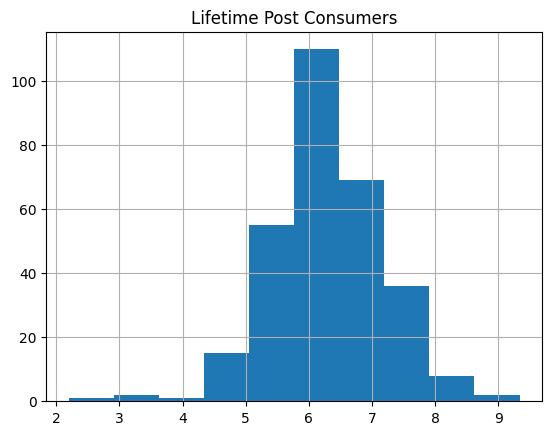

In [6]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [7]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [8]:
# Definir las pipelines para cada tipo de columna
num_pipe = Pipeline(steps=[('numImp', SimpleImputer(strategy='median'))])
num_pipe_nombres = [0]  # Columnas numéricas: ['Page total likes', 'Paid']

ord_pipe = Pipeline(steps=[
    ('OrdImp', SimpleImputer(strategy='most_frequent')),
    ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
ord_pipe_nombres = [3, 4, 5]  # Columnas ordinales: ['Post Month', 'Post Weekday', 'Post Hour']

nom_pipe = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
nom_pipe_nombres = [1, 2, 6]  # Columnas nominales: ['Type', 'Category']

# Combinar las transformaciones en un ColumnTransformer
columnasTransformer = ColumnTransformer(transformers=[
    ('numpow', num_pipe, num_pipe_nombres),
    ('catOrd', ord_pipe, ord_pipe_nombres),
    ('catNom', nom_pipe, nom_pipe_nombres)
], remainder='passthrough')

# Ajustar y transformar en Train, transformar en Val y Test
XtrainT = columnasTransformer.fit_transform(Xtrain)
XvalT = columnasTransformer.transform(Xval)
XtestT = columnasTransformer.transform(Xtest)

In [9]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1004.720
Desv-Est y-logaritmo: 0.892


## **Ejercicio 3**


Best parameters found:  {'m__n_estimators': 500, 'm__min_samples_split': 10, 'm__min_samples_leaf': 1, 'm__max_features': 'sqrt', 'm__max_depth': 10, 'm__bootstrap': True}


/Users/martinjurado/Library/Mobile Documents/com~apple~CloudDocs/Tec/Primer_Trimestre/Ciencia y analítica de datos/codigos/actividades-MartinJuradoP/env_data/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/martinjurado/Library/Mobile Documents/com~apple~CloudDocs/Tec/Primer_Trimestre/Ciencia y analítica de datos/codigos/actividades-MartinJuradoP/env_data/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/martinjurado/Library/Mobile Documents/com~apple~CloudDocs/Tec/Primer_Trimestre/Ciencia y analítica de datos/codigos/actividades-MartinJuradoP/env_data/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown ca

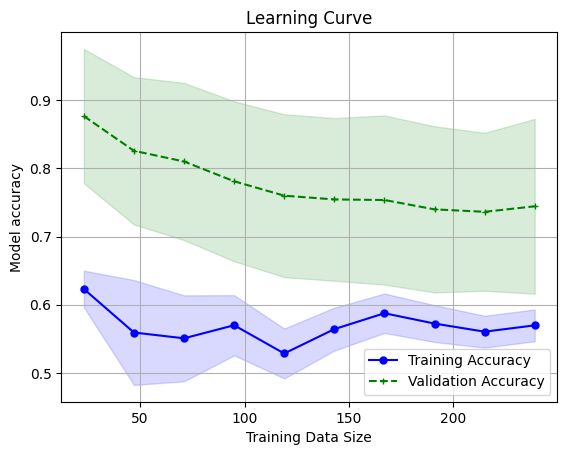

In [10]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:
# Suprimir las advertencias
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

# Configurar logging
logging.getLogger().setLevel(logging.WARNING)


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++



param_distributions = {
    'm__n_estimators': [100, 200, 300, 400, 500],
    'm__max_features': ['auto', 'sqrt', 'log2'],
    'm__max_depth': [10, 20, 30, 40, 50, None],
    'm__min_samples_split': [2, 5, 10],
    'm__min_samples_leaf': [1, 2, 4],
    'm__bootstrap': [True, False]
}

elmodelo_RF = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator=Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_RF)]),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=0,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='neg_mean_squared_error')

random_search.fit(Xtrain, np.ravel(ytrainlog))

print("Best parameters found: ", random_search.best_params_)

elmodelo_RF = random_search.best_estimator_.named_steps['m']

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        verbose=0, 
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [11]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
best_params_RF = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 50,
    'bootstrap': True
}
elmodelo_RF = RandomForestRegressor(**best_params_RF)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.698


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [12]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt


# XGBOOST

In [13]:


# Define el modelo XGBoost
elmodelo_XGB = XGBRegressor()

# Define la grilla de hiperparámetros a buscar
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_XGB = GridSearchCV(estimator=elmodelo_XGB, param_grid=param_grid_XGB, cv=5, scoring='neg_mean_squared_error')
grid_search_XGB.fit(Xtrain, np.ravel(ytrainlog))

# Obtiene los mejores hiperparámetros
best_params_XGB = grid_search_XGB.best_params_
print("Best parameters found for XGBoost:", best_params_XGB)


Best parameters found for XGBoost: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}


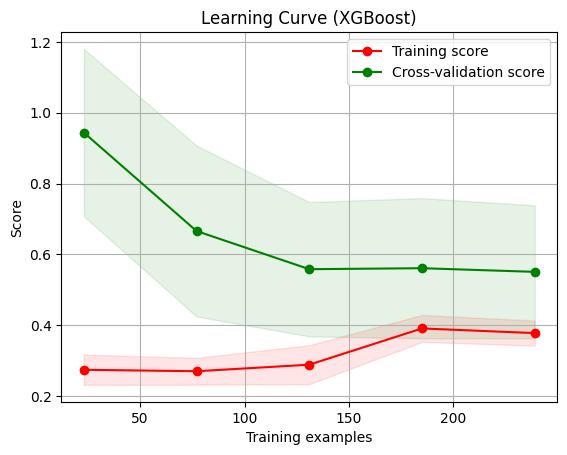

Error RSME(Test) de XGBoost: 0.688


In [14]:
# XGBoost
elmodelo_XGB = XGBRegressor(**best_params_XGB)
mipipe_XGB = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])
mipipe_XGB.fit(Xtrain, np.ravel(ytrainlog))

# Plot learning curve
plot_learning_curve(mipipe_XGB, "Learning Curve (XGBoost)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()

yhattest_XGB = mipipe_XGB.predict(Xtest)
print('Error RSME(Test) de XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB)))


# SVM 

In [15]:

# Define el modelo SVM
elmodelo_SVM = SVR()

# Define la grilla de hiperparámetros a buscar
param_grid_SVM = {
    'kernel': ['rbf','sigmoid'], 
    'gamma': ['scale'],
    'C': [0.1, 1, 10, 100],  # Reducir el rango de valores para C
}

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_SVM = GridSearchCV(estimator=elmodelo_SVM, param_grid=param_grid_SVM, cv=5, scoring='neg_mean_squared_error')
grid_search_SVM.fit(Xtrain, np.ravel(ytrainlog))

# Obtiene los mejores hiperparámetros
best_params_SVM = grid_search_SVM.best_params_
print("Best parameters found for SVM:", best_params_SVM)

Best parameters found for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


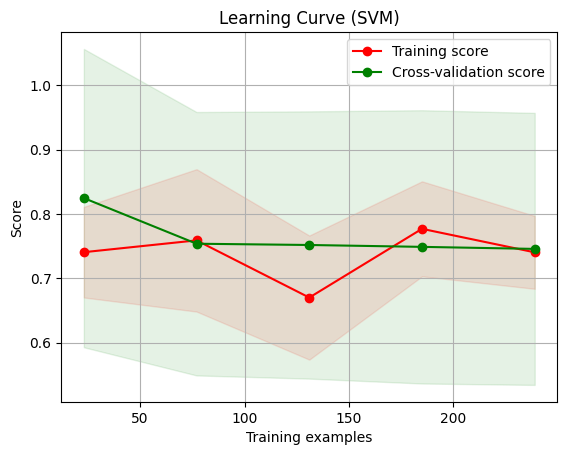

Error RSME(Test) de SVM: 0.897


In [16]:
elmodelo_SVM = SVR(**best_params_SVM)
mipipe_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])
mipipe_SVM.fit(Xtrain, np.ravel(ytrainlog))

# Plot learning curve
plot_learning_curve(mipipe_SVM, "Learning Curve (SVM)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()

yhattest_SVM = mipipe_SVM.predict(Xtest)
print('Error RSME(Test) de SVM: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM)))

# MLP

# MLP

In [17]:
from sklearn.neural_network import MLPRegressor

# Define el modelo MLP
elmodelo_MLP = MLPRegressor()

# Define la grilla de hiperparámetros a buscar
param_grid_MLP = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_MLP = GridSearchCV(estimator=elmodelo_MLP, param_grid=param_grid_MLP, cv=5, verbose=0,  scoring='neg_mean_squared_error')
grid_search_MLP.fit(Xtrain, np.ravel(ytrainlog))

# Obtiene los mejores hiperparámetros
best_params_MLP = grid_search_MLP.best_params_
print("Best parameters found for MLP:", best_params_MLP)

Best parameters found for MLP: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}


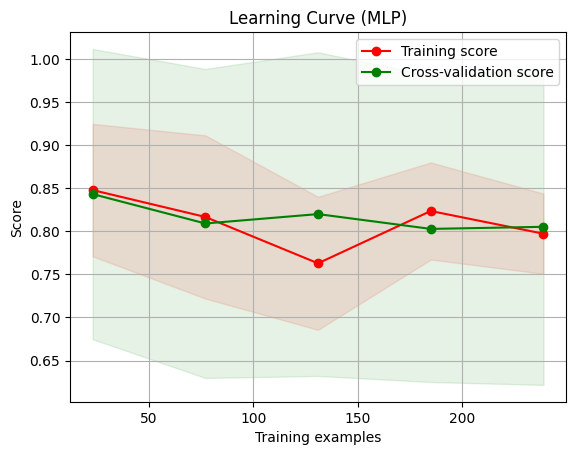

Error RSME(Test) de MLP: 0.889


In [18]:
# MLP
elmodelo_MLP = MLPRegressor(**best_params_MLP)
mipipe_MLP = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])
mipipe_MLP.fit(Xtrain, np.ravel(ytrainlog))
# Plot learning curve
plot_learning_curve(mipipe_MLP, "Learning Curve (MLP)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()

yhattest_MLP = mipipe_MLP.predict(Xtest)
print('Error RSME(Test) de MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

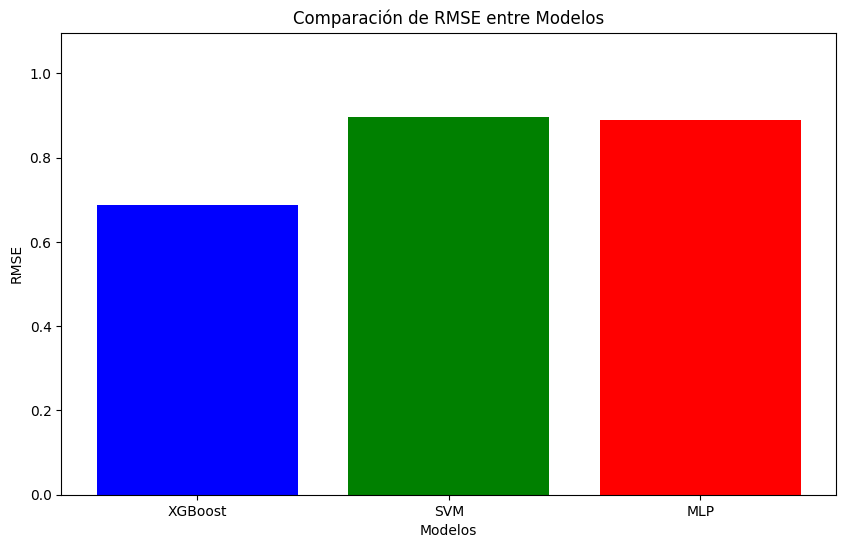

In [19]:
# Valores RMSE obtenidos para cada modelo
rmse_XGB = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB))
rmse_SVM = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM))
rmse_MLP = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP))

# Nombres de los modelos
modelos = ['XGBoost', 'SVM', 'MLP']
rmse_values = [rmse_XGB, rmse_SVM, rmse_MLP]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(modelos, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.ylim(0, max(rmse_values) + 0.2)
plt.show()


### Conclusiones

**Comparación de Modelos**

- **XGBoost**: El modelo XGBoost tiene el menor error RMSE (0.688), indicando que tiene el mejor rendimiento en términos de precisión.
- **SVM**: El modelo SVM tiene un RMSE de 0.897, lo cual es mayor que el de XGBoost.
- **MLP**: El modelo MLP tiene un RMSE de 0.889, que es mejor que SVM pero no tan bueno como XGBoost.

**Conclusión:**

El mejor modelo obtenido es el **XGBoost**, ya que tiene el menor RMSE en el conjunto de prueba, lo que indica una mejor capacidad de predicción en comparación con los otros modelos probados (SVM y MLP).

**Explicación Científica:**

El RMSE (Root Mean Square Error) es una métrica comúnmente utilizada para medir la precisión de un modelo de regresión. Representa la raíz cuadrada de la media de los errores al cuadrado, lo que proporciona una medida de la magnitud promedio de los errores de predicción. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

- **XGBoost**: Es un algoritmo de boosting que combina varios árboles de decisión débiles para formar un modelo robusto. Su capacidad para manejar interacciones complejas entre características y regularización incorporada ayuda a evitar el sobreajuste, lo que generalmente resulta en una mejor precisión predictiva.

- **SVM**: Las Máquinas de Vectores de Soporte funcionan bien en problemas de alta dimensionalidad y son efectivas en casos donde el número de dimensiones es mayor que el número de muestras. Sin embargo, pueden no ser tan eficientes en la captura de relaciones no lineales complejas sin un ajuste cuidadoso de los parámetros del kernel.

- **MLP**: Las Redes Neuronales Perceptrón Multicapa son poderosas para capturar relaciones no lineales y complejas en los datos. Sin embargo, requieren una cantidad significativa de ajuste de hiperparámetros y pueden ser susceptibles al sobreajuste, especialmente con datos de entrenamiento limitados.

En resumen, XGBoost muestra un mejor rendimiento en este caso particular debido a su capacidad para manejar interacciones complejas y regularización efectiva, lo que resulta en una menor tasa de error en comparación con SVM y MLP.


### Las curvas de aprendizaje de los modelos XGBoost, SVM y MLP, vamos a considerar varios aspectos:

1. **Curva de aprendizaje de XGBoost:**
   - **Tendencia de la curva de entrenamiento:** La curva de entrenamiento comienza en un valor alto y disminuye a medida que aumentan los ejemplos de entrenamiento, estabilizándose alrededor de 0.2. Esto indica que el modelo XGBoost está aprendiendo bien del conjunto de entrenamiento.
   - **Tendencia de la curva de validación cruzada:** La curva de validación cruzada comienza en un valor alto y disminuye a medida que aumentan los ejemplos de entrenamiento, estabilizándose alrededor de 0.4. La diferencia entre las curvas de entrenamiento y validación cruzada disminuye con más ejemplos de entrenamiento, lo que sugiere que el modelo no está sobreajustado.
   - **Espacio entre las curvas:** La distancia entre las curvas de entrenamiento y validación cruzada es significativa, pero se reduce con más datos de entrenamiento, lo que indica que el modelo podría beneficiarse de más datos para mejorar su rendimiento.

2. **Curva de aprendizaje de SVM:**
   - **Tendencia de la curva de entrenamiento:** La curva de entrenamiento de SVM es más constante y no muestra una clara mejora a medida que aumentan los ejemplos de entrenamiento. Oscila alrededor de 0.7.
   - **Tendencia de la curva de validación cruzada:** La curva de validación cruzada también muestra una oscilación y se cruza con la curva de entrenamiento, lo que indica inestabilidad en el rendimiento del modelo con respecto a diferentes subconjuntos de datos de entrenamiento.
   - **Espacio entre las curvas:** La distancia entre las curvas de entrenamiento y validación cruzada no es consistente y muestra variaciones, lo que puede sugerir que el modelo SVM no está bien ajustado y podría beneficiarse de una optimización adicional de hiperparámetros o de más datos de entrenamiento.

3. **Curva de aprendizaje de MLP:**
   - **Tendencia de la curva de entrenamiento:** La curva de entrenamiento de MLP también muestra una tendencia decreciente, estabilizándose alrededor de 0.7, similar a la curva de SVM.
   - **Tendencia de la curva de validación cruzada:** La curva de validación cruzada para MLP muestra una oscilación similar y también se cruza con la curva de entrenamiento, indicando inestabilidad en el rendimiento del modelo.
   - **Espacio entre las curvas:** Al igual que en el caso de SVM, la distancia entre las curvas de entrenamiento y validación cruzada muestra variaciones, lo que sugiere que el modelo MLP podría necesitar más datos o una mejor optimización de hiperparámetros para mejorar su rendimiento.

**Conclusiones generales:**
- **XGBoost:** Parece ser el modelo más estable y con mejor rendimiento de los tres, dado que sus curvas de entrenamiento y validación cruzada se estabilizan y tienen menor variación.
- **SVM y MLP:** Ambos modelos muestran inestabilidad en las curvas de aprendizaje, lo que sugiere que podrían beneficiarse de más datos de entrenamiento o de una mejor optimización de hiperparámetros.
- **Recomendaciones:** Podría ser beneficioso realizar más pruebas con diferentes tamaños de conjuntos de datos y ajustar los hiperparámetros para SVM y MLP. Además, se podría considerar la posibilidad de aumentar el tamaño del conjunto de datos de entrenamiento para mejorar la estabilidad y el rendimiento general de los modelos.

Este análisis se basa en las tendencias y comportamientos observados en las curvas de aprendizaje proporcionadas.

>> **Fin de la Actividad de la Semana 7**